# Solar Demo

The following shows the Redhorse version of the PVWatts algorithm. The reason we needed our own version is PVWatts requires an api key to access their algorithm and that api key has a limited number of uses per day. For the GSA it would take roughly 4 days to get all the required data. Thus the creation of this algorithm, which uses the same data and roughly the same algorithm but without the api key. 

In [1]:
import matplotlib.pyplot as plt
from solar import solar_pv
import numpy as np

As a demonstration I have chosen the GSA building and run it through both my algorithm and PVWatts (PVWatts does not allow you to use a percentage of the roof so I tried to grab close to 25%)

![Alt text](image.png)

In [2]:
solar_calc = solar_pv(38.886777, -77.02997, 374686.66666)
solar_calc.analyze()

PVWatts_rad = [3.43,4.38,5.00,5.52,5.68,6.28,6.40,5.79,5.31,4.40,3.46,2.88]
PVWatts_ac = [119654,135926,167044,172955,176516,186025,195303,173588,158842,143913,111910,99415]

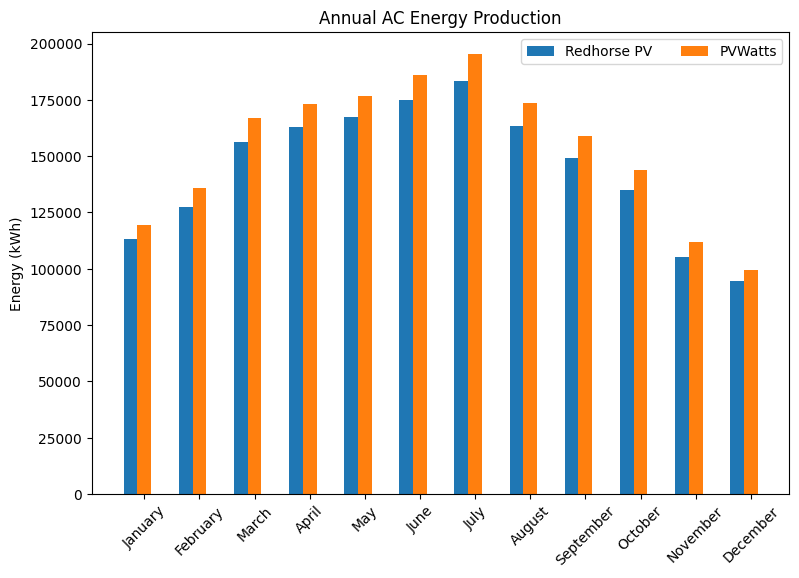

In [3]:
bar_titles = ['January','February','March','April','May','June','July','August','September','October','November','December']

bar_data = {"Redhorse PV": solar_calc.monthly_ac,
            "PVWatts": PVWatts_ac}
x = np.arange(len(bar_titles))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

plt.figure(figsize=(9,6))
for attribute, measurement in bar_data.items():
    offset = width * multiplier
    rects = plt.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.

plt.ylabel('Energy (kWh)')
plt.title('Annual AC Energy Production')
plt.xticks(x + width, bar_titles, rotation=45)   
plt.legend(loc='upper right', ncols=2)

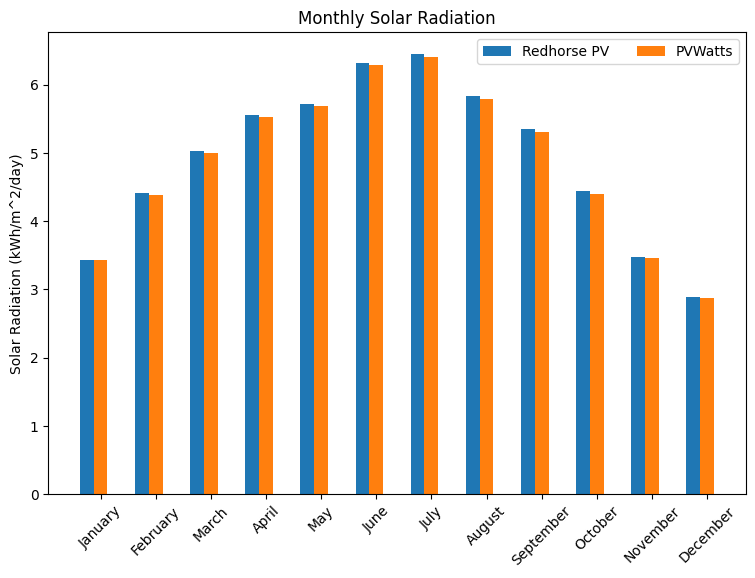

In [4]:
bar_titles = ['January','February','March','April','May','June','July','August','September','October','November','December']

bar_data = {"Redhorse PV": solar_calc.monthly_rad,
            "PVWatts": PVWatts_rad}
x = np.arange(len(bar_titles))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

plt.figure(figsize=(9,6))
for attribute, measurement in bar_data.items():
    offset = width * multiplier
    rects = plt.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.

plt.ylabel('Solar Radiation (kWh/m^2/day)')
plt.title('Monthly Solar Radiation')
plt.xticks(x + width, bar_titles, rotation=45)   
plt.legend(loc='upper right', ncols=2)

Text(0.5, 1.0, 'AC Power by Hour for the Month of September')

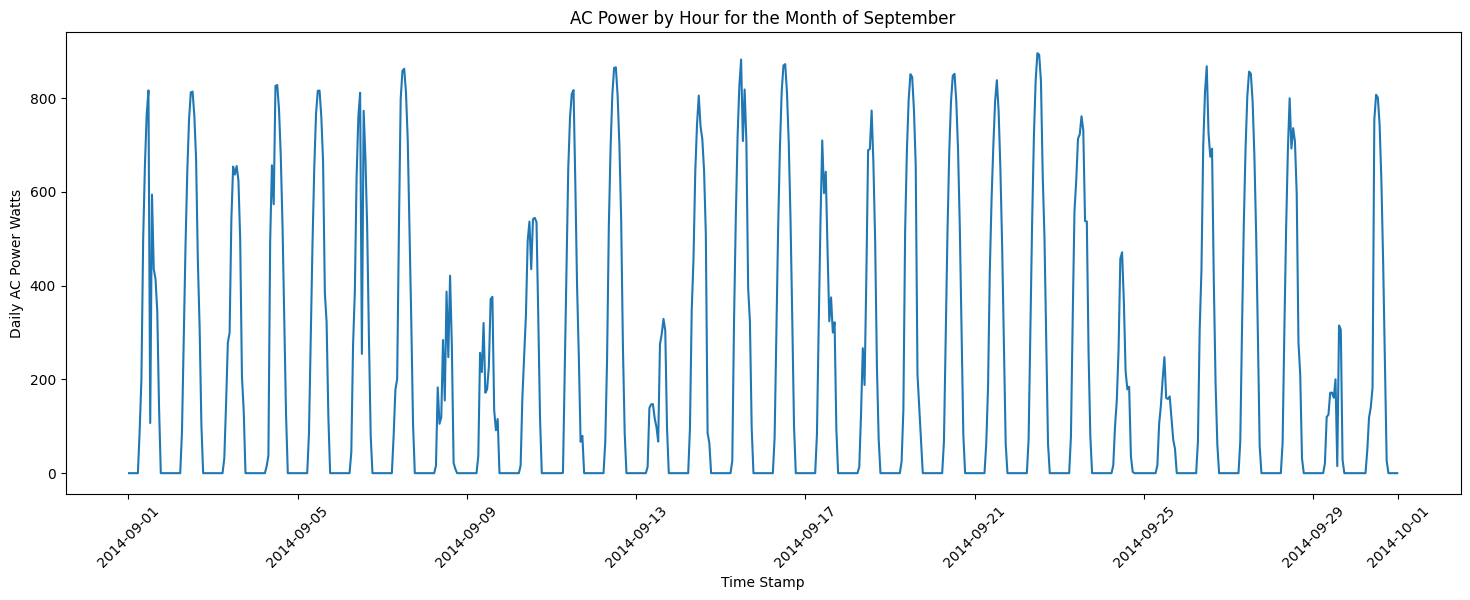

In [5]:
plt.figure(figsize=(18,6))
y = solar_calc.solar_power.loc[solar_calc.solar_power.index.month==9]['AC Power']
x = solar_calc.solar_power.loc[solar_calc.solar_power.index.month==9].index
plt.plot(x, y)
plt.xlabel("Time Stamp")
plt.xticks(rotation=45)   
plt.ylabel('Daily AC Power Watts')
plt.title('AC Power by Hour for the Month of September')

